In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

D:\Codes\binarybharat\Sleepiness-Prediction-model\pyvenv\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Ayush Agrawal/.cache\torch\hub\master.zip
YOLOv5  2023-10-21 Python-3.11.0 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14

In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [8]:
img

'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 1407.1ms pre-process, 417.8ms inference, 162.0ms NMS per image at shape (1, 3, 448, 640)


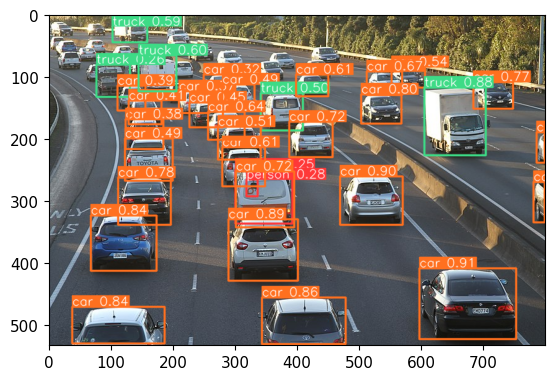

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
import uuid   # Unique identifier
import os
import time

In [20]:
img = "download.jpeg"

In [21]:
results = model(img)
results.print()

image 1/1: 168x300 3 persons
Speed: 266.9ms pre-process, 206.0ms inference, 8.0ms NMS per image at shape (1, 3, 384, 640)


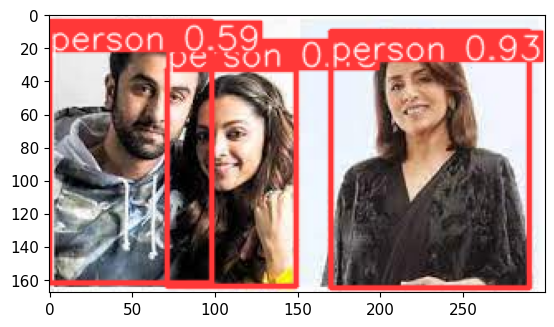

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Creating Custom Model

In [23]:
import uuid   # Unique identifier
import os
import time

In [34]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 2
BASE_DIR = os.getcwd()

In [35]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        img_path = os.path.join(BASE_DIR, IMAGES_PATH)
        imgname = os.path.join(img_path, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        # k = cv2.waitKey(0)
        # if k == ord("s"):
        # cv2.imwrite(imgname, frame)
        if cv2.imwrite(imgname, frame):
            print(f"Image saved as {imgname}")
        else:
            print("Failed to save the image.")
        # else:
        #     pass
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Failed to save the image.
Failed to save the image.
Failed to save the image.
Failed to save the image.


In [31]:
!dir

 Volume in drive D is Study
 Volume Serial Number is 1CD1-FA86

 Directory of D:\Codes\binarybharat\AlgoYOLO

10/21/2023  09:50 PM    <DIR>          .
10/21/2023  06:50 PM    <DIR>          ..
10/21/2023  06:52 PM    <DIR>          .ipynb_checkpoints
10/21/2023  07:10 PM             9,106 download.jpeg
10/21/2023  09:29 PM    <DIR>          labelImg
10/21/2023  07:15 PM             1,027 stfile.py
10/21/2023  09:50 PM           719,166 Untitled.ipynb
10/21/2023  06:55 PM    <DIR>          yolov5
10/21/2023  07:00 PM        14,808,437 yolov5s.pt
               4 File(s)     15,537,736 bytes
               5 Dir(s)  13,275,193,344 bytes free


# Load custom model

In [36]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Ayush Agrawal/.cache\torch\hub\master.zip
YOLOv5  2023-10-21 Python-3.11.0 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [37]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [38]:
img = '1.jpg'

In [39]:
results = model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 8.0ms pre-process, 125.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


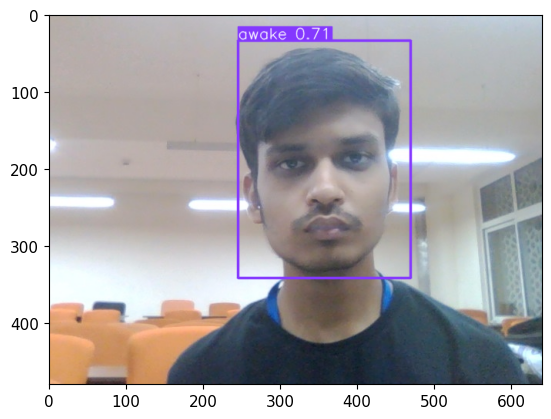

In [40]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [43]:
results.pred

[tensor([[245.44803,  34.57321, 469.19656, 342.38626,   0.70951,  15.00000]], device='cuda:0')]

In [44]:
img2 = '2.jpg'

In [45]:
results2 = model(img2)
results2.print()

image 1/1: 480x640 1 drowsy
Speed: 4.0ms pre-process, 106.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


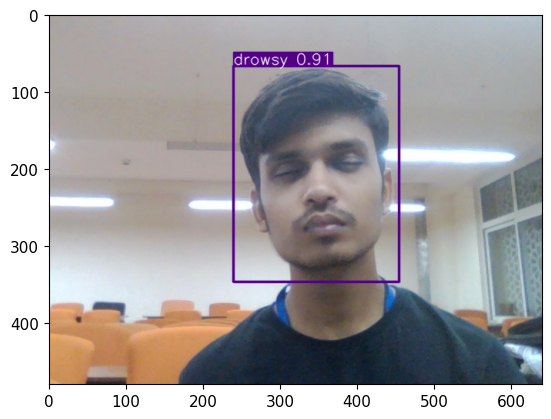

In [46]:
%matplotlib inline 
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [47]:
results2.pred

[tensor([[239.66791,  67.24825, 454.23242, 347.11609,   0.90651,  16.00000]], device='cuda:0')]

In [49]:
results.names


{0: 'dog',
 1: 'person',
 2: 'cat',
 3: 'tv',
 4: 'car',
 5: 'meatballs',
 6: 'marinara sauce',
 7: 'tomato soup',
 8: 'chicken noodle soup',
 9: 'french onion soup',
 10: 'chicken breast',
 11: 'ribs',
 12: 'pulled pork',
 13: 'hamburger',
 14: 'cavity',
 15: 'awake',
 16: 'drowsy'}

In [53]:
results2.pred[0][0][-1] #16: drowsy, 15: awake

tensor(16., device='cuda:0')

In [54]:
results.pred[0][0][-1] #16: drowsy, 15: awake

tensor(15., device='cuda:0')

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2